In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing import image


In [2]:
import pathlib
import os
data_dir_train=r"E:\tree_data\train"
data_dir_train = pathlib.Path(data_dir_train)
data_dir_test=r"E:\tree_data\test"
data_dir_test = pathlib.Path(data_dir_test)
data_dir_val=r"E:\tree_data\validation"
data_dir_val = pathlib.Path(data_dir_val)
image_count_train= len(list(data_dir_train.glob('*/*')))
image_count_test= len(list(data_dir_test.glob('*/*')))
image_count_val= len(list(data_dir_val.glob('*/*')))
print("total image:",image_count_train+image_count_test+image_count_val)
print("train data 70%: ",image_count_train,"image")
print("test data 20%: ",image_count_test,"image")
print("validation data 10%: ",image_count_val,"image")


total image: 960
train data 70%:  672 image
test data 20%:  192 image
validation data 10%:  96 image


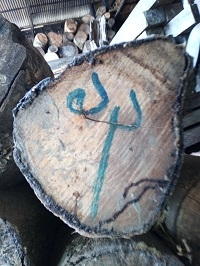

In [3]:
mango = list(data_dir_train.glob('Mango/*'))
PIL.Image.open(str(mango[0]))

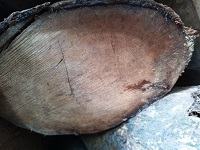

In [4]:
PIL.Image.open(str(mango[1]))

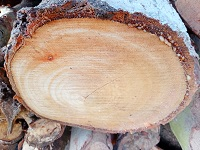

In [5]:
ashoke = list(data_dir_train.glob('Ashoke/*'))
PIL.Image.open(str(ashoke[0]))

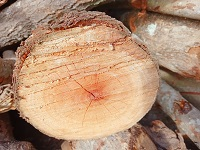

In [6]:
PIL.Image.open(str(ashoke[1]))

In [7]:
batch_size = 9
img_height = 224
img_width = 224

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 672 files belonging to 14 classes.


In [9]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 192 files belonging to 14 classes.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


In [11]:
class_names = test_ds.class_names
print(class_names)

['Arjun', 'Ashoke', 'Litchi', 'Mango', 'Mehgoni', 'Neem', 'Raj koroi', 'Segun', 'Shemul', 'Tamarind', 'Ucliptus', 'jack Fruit', 'jam', 'pahari Gamai']


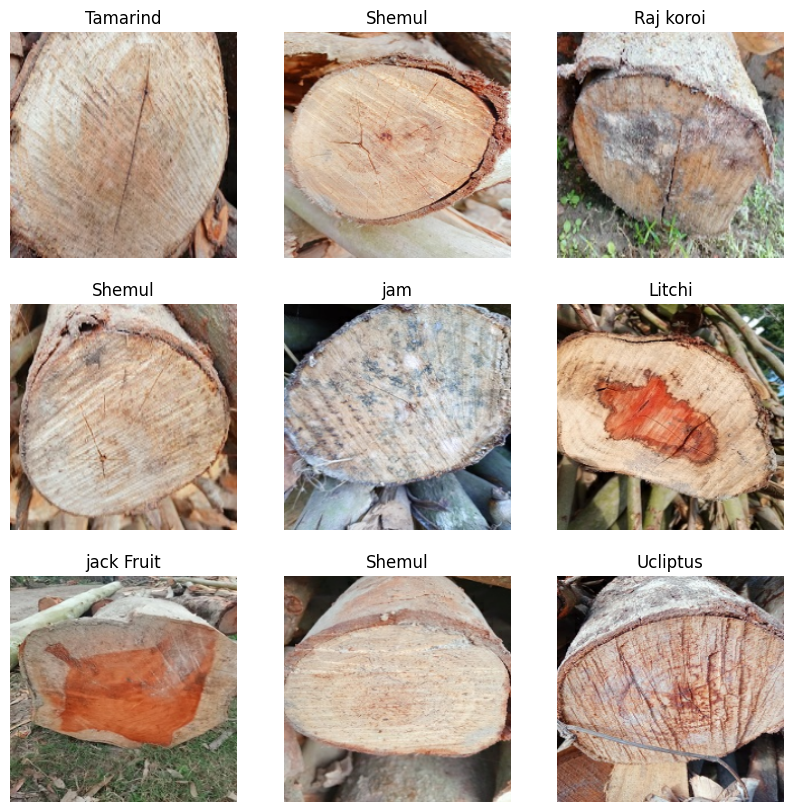

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(9, 224, 224, 3)
(9,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [15]:
normalization_layer = layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9973324


In [17]:
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.models import Sequential
from glob import glob

In [18]:
num_classes = len(class_names)


In [19]:
model =ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/50


C:\Users\Md. Minhazul Abedin\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 197s 3s/step - loss: 2.9476 - accuracy: 0.2247 - val_loss: 368.3345 - val_accuracy: 0.0312
Epoch 2/50
75/75 [==============================] - 190s 3s/step - loss: 1.7960 - accuracy: 0.3765 - val_loss: 6.0213 - val_accuracy: 0.1562
Epoch 3/50
75/75 [==============================] - 193s 3s/step - loss: 1.3976 - accuracy: 0.5045 - val_loss: 2.9490 - val_accuracy: 0.1667
Epoch 4/50
75/75 [==============================] - 203s 3s/step - loss: 1.0527 - accuracy: 0.6161 - val_loss: 6.1819 - val_accuracy: 0.0990
Epoch 5/50
75/75 [==============================] - 200s 3s/step - loss: 0.8427 - accuracy: 0.7024 - val_loss: 3.3977 - val_accuracy: 0.3490
Epoch 6/50
75/75 [==============================] - 207s 3s/step - loss: 0.6582 - accuracy: 0.7827 - val_loss: 5.4235 - val_accuracy: 0.0938
Epoch 7/50
75/75 [==============================] - 200s 3s/step - loss: 0.4699 - accuracy: 0.8199 - val_loss: 2.1680 - val_accuracy: 0.5000
Epoch 8/50
75/75 [====

In [22]:
train_accuracy=history.history['accuracy']
t_accuracy=0
for x in train_accuracy:
    t_accuracy=t_accuracy+x
t_accuracy=(t_accuracy/epochs)*100

val_accuracy=history.history['val_accuracy']
v_accuracy=0
for x in val_accuracy:
    v_accuracy=v_accuracy+x
v_accuracy=(v_accuracy/epochs)*100
print("Train Accuracy : ",train_accuracy)
print("Valiation Accuracy : ",val_accuracy)
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("Train Accuracy average : ",t_accuracy,"%")
print("Valiation Accuracy average : ",v_accuracy,"%")
print("Max Accuracy: ",max(val_accuracy)*100)

Train Accuracy :  [0.224702388048172, 0.3764880895614624, 0.5044642686843872, 0.6160714030265808, 0.7023809552192688, 0.7827380895614624, 0.819940447807312, 0.8720238208770752, 0.9107142686843872, 0.930059552192688, 0.9360119104385376, 0.9464285969734192, 0.976190447807312, 0.9747023582458496, 0.9791666865348816, 0.9702380895614624, 0.7008928656578064, 0.6532738208770752, 0.867559552192688, 0.9226190447807312, 0.9404761791229248, 0.976190447807312, 0.9895833134651184, 0.988095223903656, 0.9910714030265808, 0.9895833134651184, 0.9940476417541504, 0.9955357313156128, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.997023

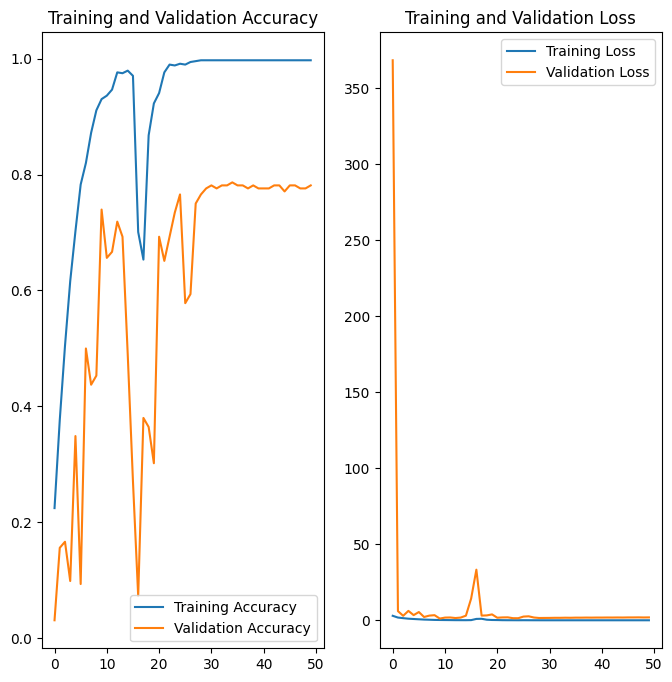

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

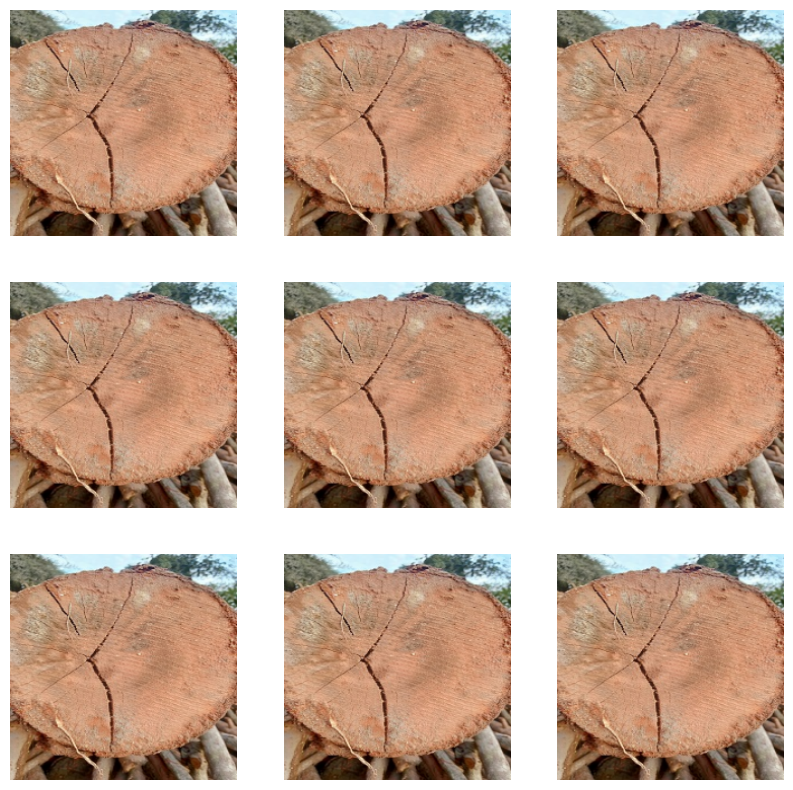

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/50
75/75 [==============================] - 189s 2s/step - loss: 0.3706 - accuracy: 0.8795 - val_loss: 7.0527 - val_accuracy: 0.2448
Epoch 2/50
75/75 [==============================] - 186s 2s/step - loss: 0.4705 - accuracy: 0.8318 - val_loss: 12.7079 - val_accuracy: 0.1562
Epoch 3/50
75/75 [==============================] - 193s 3s/step - loss: 0.2469 - accuracy: 0.9256 - val_loss: 2.3820 - val_accuracy: 0.5521
Epoch 4/50
75/75 [==============================] - 188s 3s/step - loss: 0.1357 - accuracy: 0.9420 - val_loss: 4.2054 - val_accuracy: 0.4323
Epoch 5/50
75/75 [==============================] - 186s 2s/step - loss: 0.1105 - accuracy: 0.9613 - val_loss: 5.3729 - val_accuracy: 0.2448
Epoch 6/50
75/75 [==============================] - 186s 2s/step - loss: 0.1094 - accuracy: 0.9688 - val_loss: 3.9614 - val_accuracy: 0.4896
Epoch 7/50
75/75 [==============================] - 188s 3s/step - loss: 0.0973 - accuracy: 0.9702 - val_loss: 2.7749 - val_accuracy: 0.6615
Epoch 8/50
7

In [28]:
train_accuracy=history.history['accuracy']
t_accuracy=0
for x in train_accuracy:
    t_accuracy=t_accuracy+x
t_accuracy=(t_accuracy/epochs)*100

val_accuracy=history.history['val_accuracy']
v_accuracy=0
for x in val_accuracy:
    v_accuracy=v_accuracy+x
v_accuracy=(v_accuracy/epochs)*100
print("Train Accuracy_aug : ",train_accuracy)
print("Valiation Accuracy_aug : ",val_accuracy)
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")
print("====================================================================================================")

print("Train Accuracy average_aug : ",t_accuracy,"%")
print("Valiation Accuracy average_aug : ",v_accuracy,"%")
print("Max Accuracy: ",max(val_accuracy)*100)

Train Accuracy_aug :  [0.8794642686843872, 0.831845223903656, 0.925595223903656, 0.9419642686843872, 0.961309552192688, 0.96875, 0.9702380895614624, 0.9627976417541504, 0.898809552192688, 0.8482142686843872, 0.9107142686843872, 0.9672619104385376, 0.980654776096344, 0.9851190447807312, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.9970238208770752, 0.99702382087

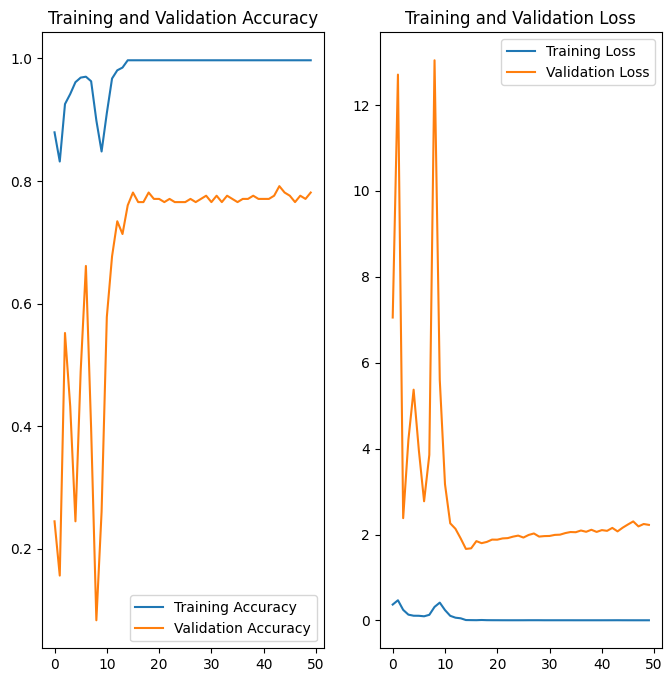

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
for y in list(data_dir_val.glob('*/*')):
    
    img = tf.keras.utils.load_img(
    y, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print (y)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
      

1/1 [==============================] - 1s 949ms/step
E:\tree_data\validation\Arjun\Arjun(1).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 118ms/step
E:\tree_data\validation\Arjun\Arjun(2).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 105ms/step
E:\tree_data\validation\Arjun\Arjun(3).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 103ms/step
E:\tree_data\validation\Arjun\Arjun(4).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 92ms/step
E:\tree_data\validation\Arjun\Arjun(5).jpg
This image most likely belongs to Arjun with a 0.27 percent confidence.
1/1 [==============================] - 0s 100ms/step
E:\tree_data\validation\Arjun\Arjun(6).jpg
This image most likely belongs to Ashoke with a 0.25 percent conf